In [1]:
# Importing Libaries ToolKit
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# id: A unique identifier for each entry in the dataset.
# Diagnosis: Indicates the diagnosis of breast cancer. 'M' typically stands for malignant (cancerous), and 'B' stands for benign (non-cancerous).
# radius_mean: Mean of distances from the center to points on the perimeter of the tumor.
# texture_mean: Standard deviation of gray-scale values.
# perimeter_mean: Mean size of the core tumor.
# area_mean: Mean size of the area covered by the tumor.
# moothness_mean: Mean smoothness of the tumor boundary.
# compactness_mean: Mean compactness (perimeter^2 / area - 1.0).
# concavity_mean: Mean severity of concave portions of the contour.
# concave points_mean: Mean number of concave portions of the contour.
# ... (and so on): Similar features with '_mean' in their names, representing mean values for different aspects of the tumor.
# texture_worst: The worst (largest or most severe) standard deviation of gray-scale values in the tumor.
# perimeter_worst: The worst (largest or most severe) size of the core tumor.
# area_worst: The worst (largest or most severe) size of the area covered by the tumor.
# smoothness_worst: The worst (largest or most severe) smoothness of the tumor boundary.
# compactness_worst: The worst (largest or most severe) compactness (perimeter^2 / area - 1.0) of the tumor.
# concavity_worst: The worst (largest or most severe) severity of concave portions of the contour.
# concave points_worst: The worst (largest or most severe) number of concave portions of the contour.
# symmetry_worst: The worst (largest or most severe) symmetry of the tumor.
# fractal_dimension_worst: The worst (largest or most severe) fractal dimension, a measure of the complexity of the tumor boundary.
# These columns represent measurements of various features under the worst possible conditions for each tumor. For example, "worst texture" refers to the highest standard deviation of gray-scale values observed in the tumor among all measurements.

# Exploring a DataFrame

In [2]:
# Importing & Inspecting Data
data = pd.read_csv('data.csv')

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Data Preprocessing:

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.shape

(569, 33)

In [7]:
# Handle Missing Values
print(data.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

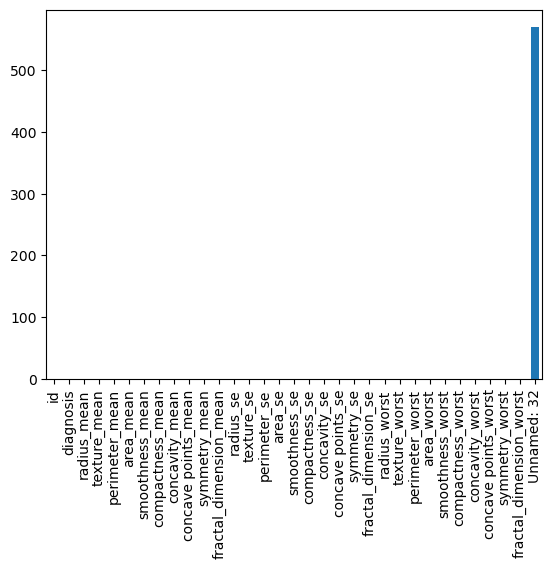

In [8]:
#Plotting missing values
data.isna().sum().plot(kind="bar")
plt.show()

In [9]:
threshold = len(data) * 0.05
print(threshold)

28.450000000000003


In [10]:
cols_to_drop = data.columns[data.isna().sum() <= threshold]
print(cols_to_drop)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [11]:
cols_with_missing_values = data.columns[data.isna().sum() > 0]
print(cols_with_missing_values)

Index(['Unnamed: 32'], dtype='object')


In [12]:
cols_to_drop = data.columns[data.isna().sum() <= threshold]
print(cols_to_drop)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [13]:
# To delete multiple columns:
columns_to_delete = ['Unnamed: 32']
data.drop(columns_to_delete, axis=1, inplace=True)

In [14]:
print(data.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [15]:
col_with_missing_value = data.columns[data.isna().sum() > 0]
print(col_with_missing_value)

Index([], dtype='object')


In [16]:
print(data.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [17]:
data.duplicated().sum()

0

In [18]:
# Find the outlier and handle
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


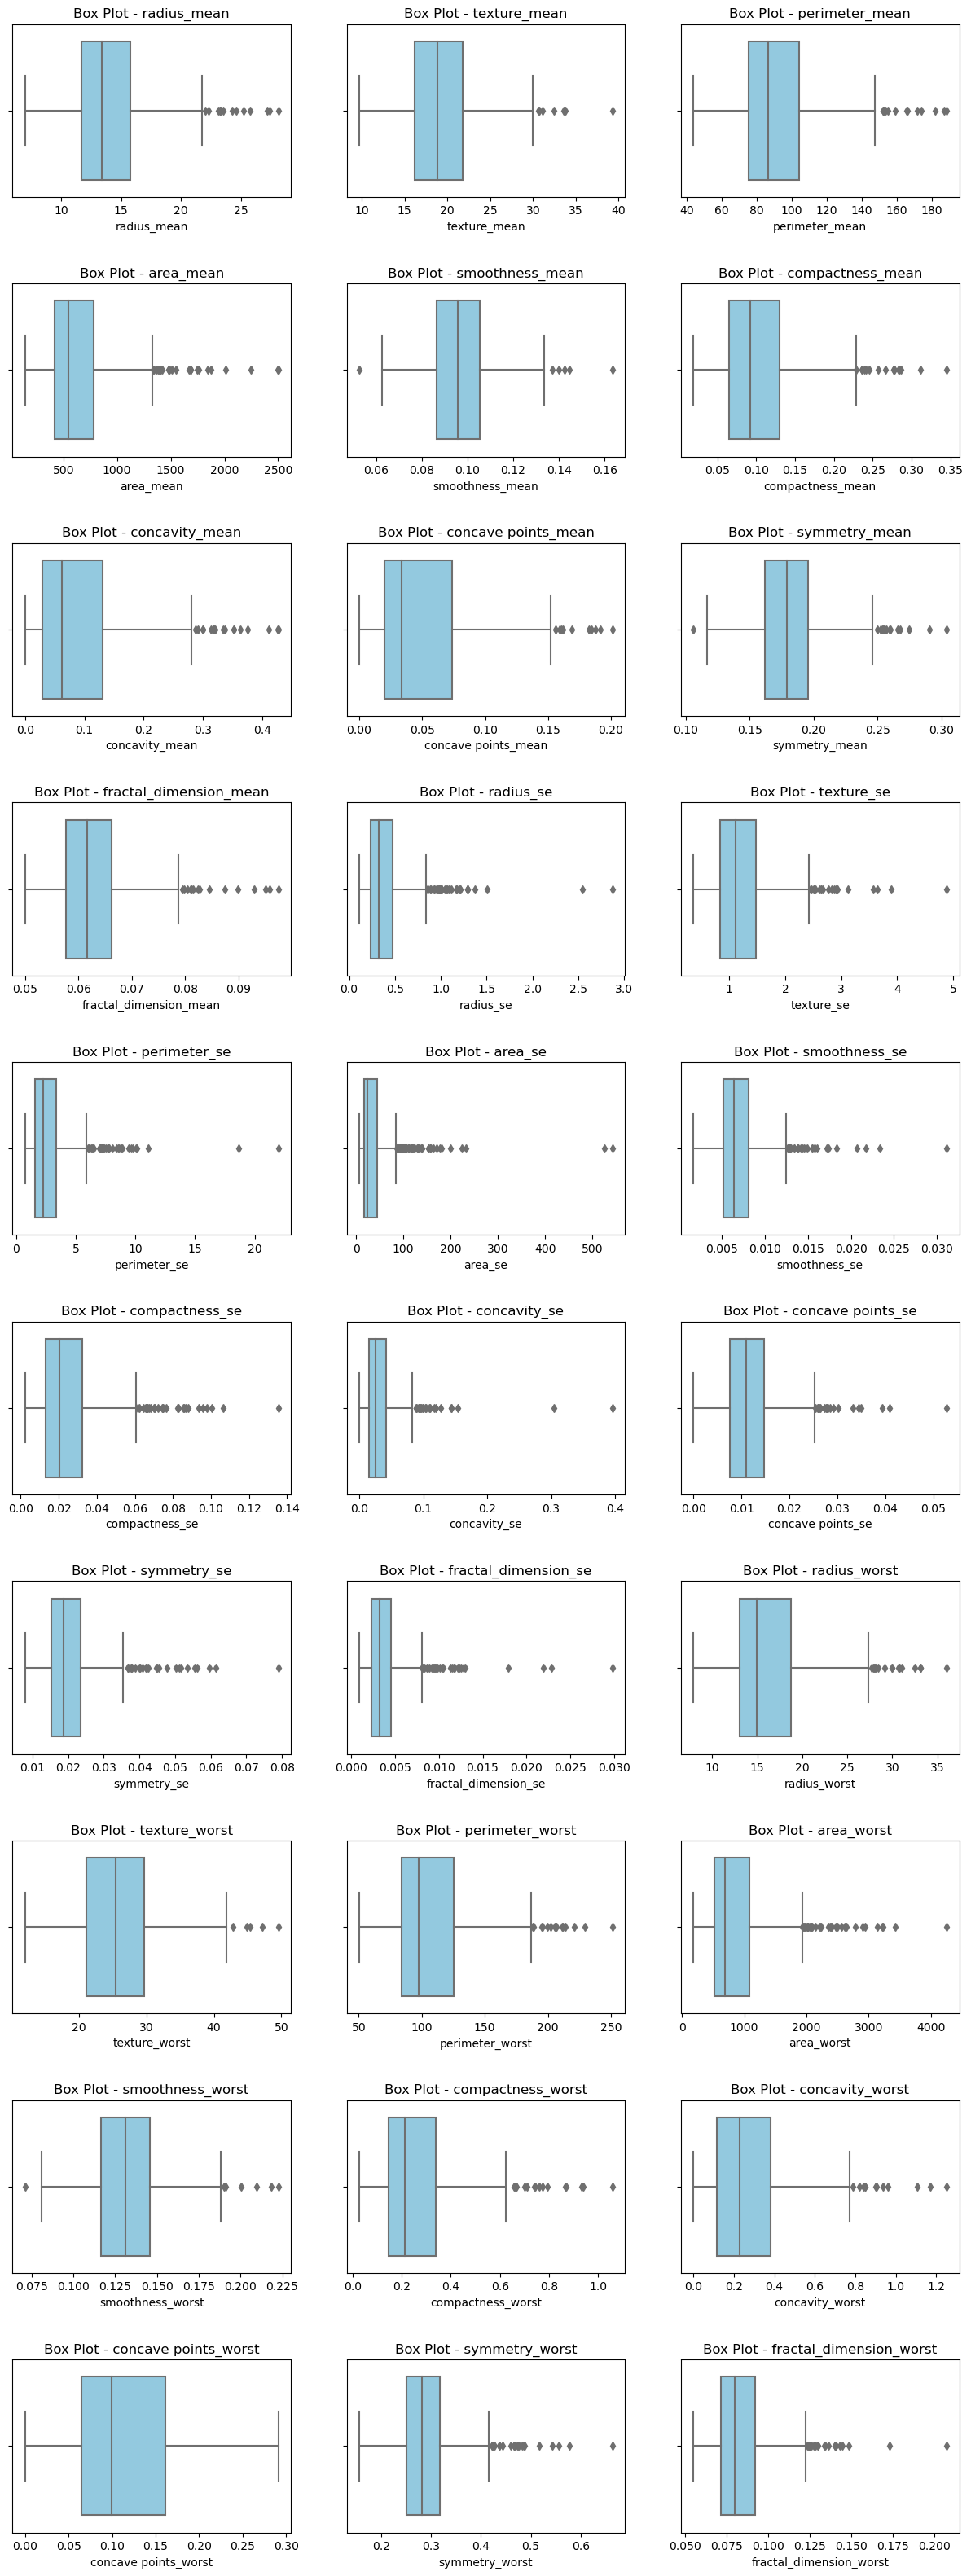

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data.copy()

numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

numerical_data = data[numerical_columns]
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(numerical_columns):
    sns.boxplot(ax=axes[i // num_cols, i % num_cols], x=numerical_data[column], color='skyblue')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot - {column}')

plt.show()


In [20]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [21]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Visualization

In [22]:
# . Diagnosis Analysis:
# - What is the distribution of diagnoses (benign vs. malignant) in the dataset?
# - How does the diagnosis vary with different mean measurements (e.g., radius_mean, texture_mean, perimeter_mean)?
# - Are there any specific features (e.g., concavity_mean, concave points_mean) that are more indicative of a malignant diagnosis?
# - Is there any correlation between the diagnosis and other features in the dataset?

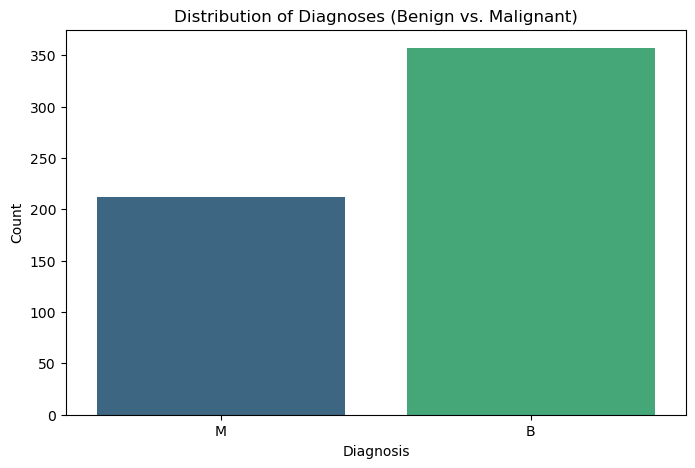

In [23]:
#Distribution of Diagnoses
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title('Distribution of Diagnoses (Benign vs. Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

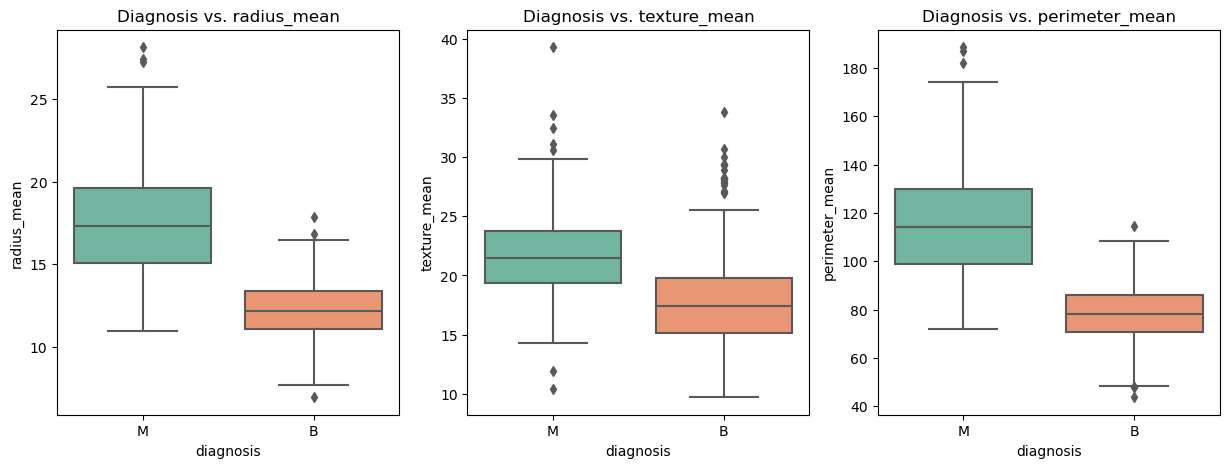

In [24]:
# Diagnosis vs. Different Mean Measurements
mean_columns = ['radius_mean', 'texture_mean', 'perimeter_mean']
plt.figure(figsize=(15, 5))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='diagnosis', y=column, data=data, palette='Set2')
    plt.title(f'Diagnosis vs. {column}')

plt.show()

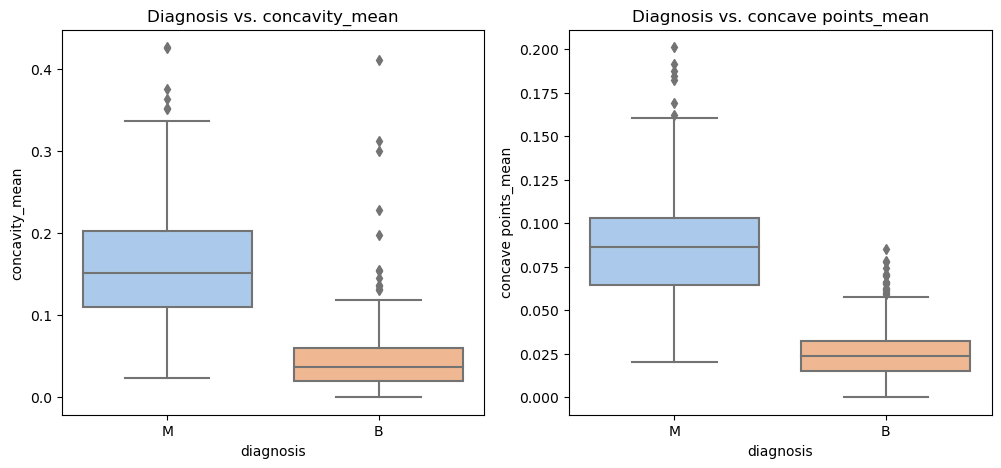

In [25]:
 #Specific Features More Indicative of a Malignant Diagnosis
specific_features = ['concavity_mean', 'concave points_mean']
plt.figure(figsize=(12, 5))

for i, column in enumerate(specific_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='diagnosis', y=column, data=data, palette='pastel')
    plt.title(f'Diagnosis vs. {column}')

plt.show()

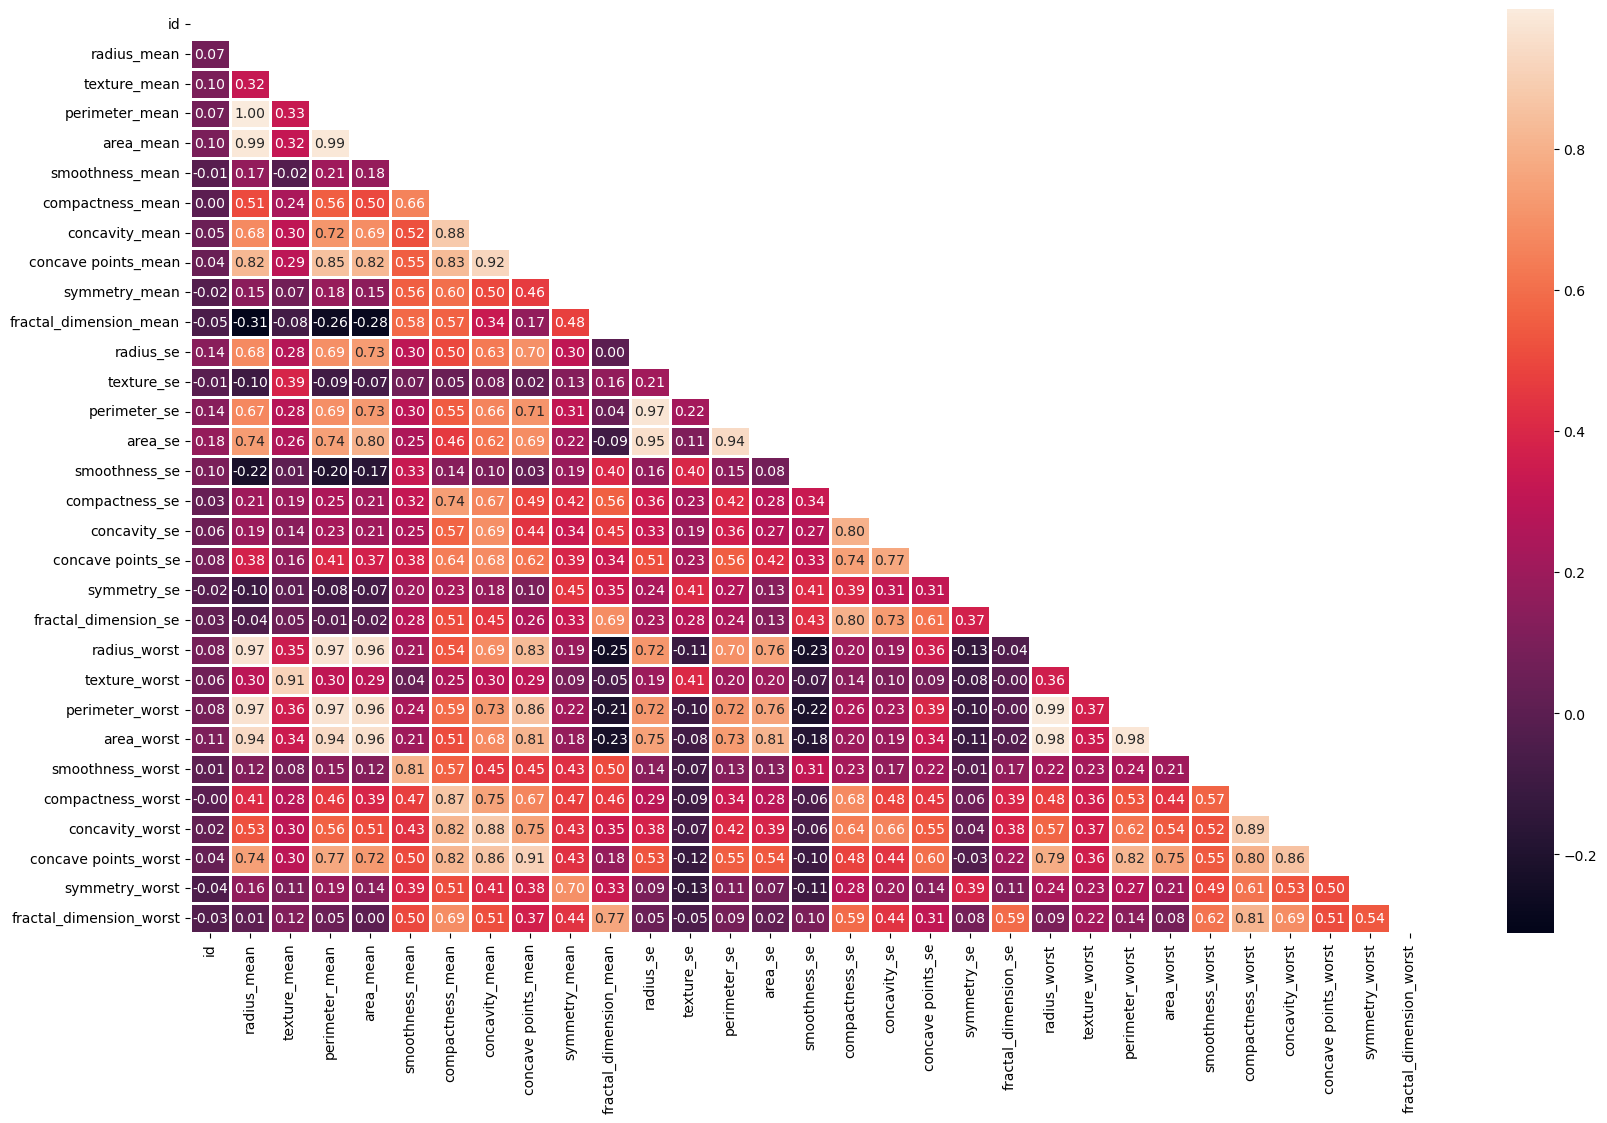

In [26]:
# This helps identify any features strongly correlated with the diagnosis
# Correlation Between Diagnosis and Other Features
numeric_columns = data.select_dtypes(include='number').columns

plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()


In [27]:
#Feature Analysis:
#How do the mean measurements (e.g., radius_mean, texture_mean, perimeter_mean) vary across different diagnoses?
#How do the features related to smoothness, compactness, concavity, and concave points vary across different diagnoses?

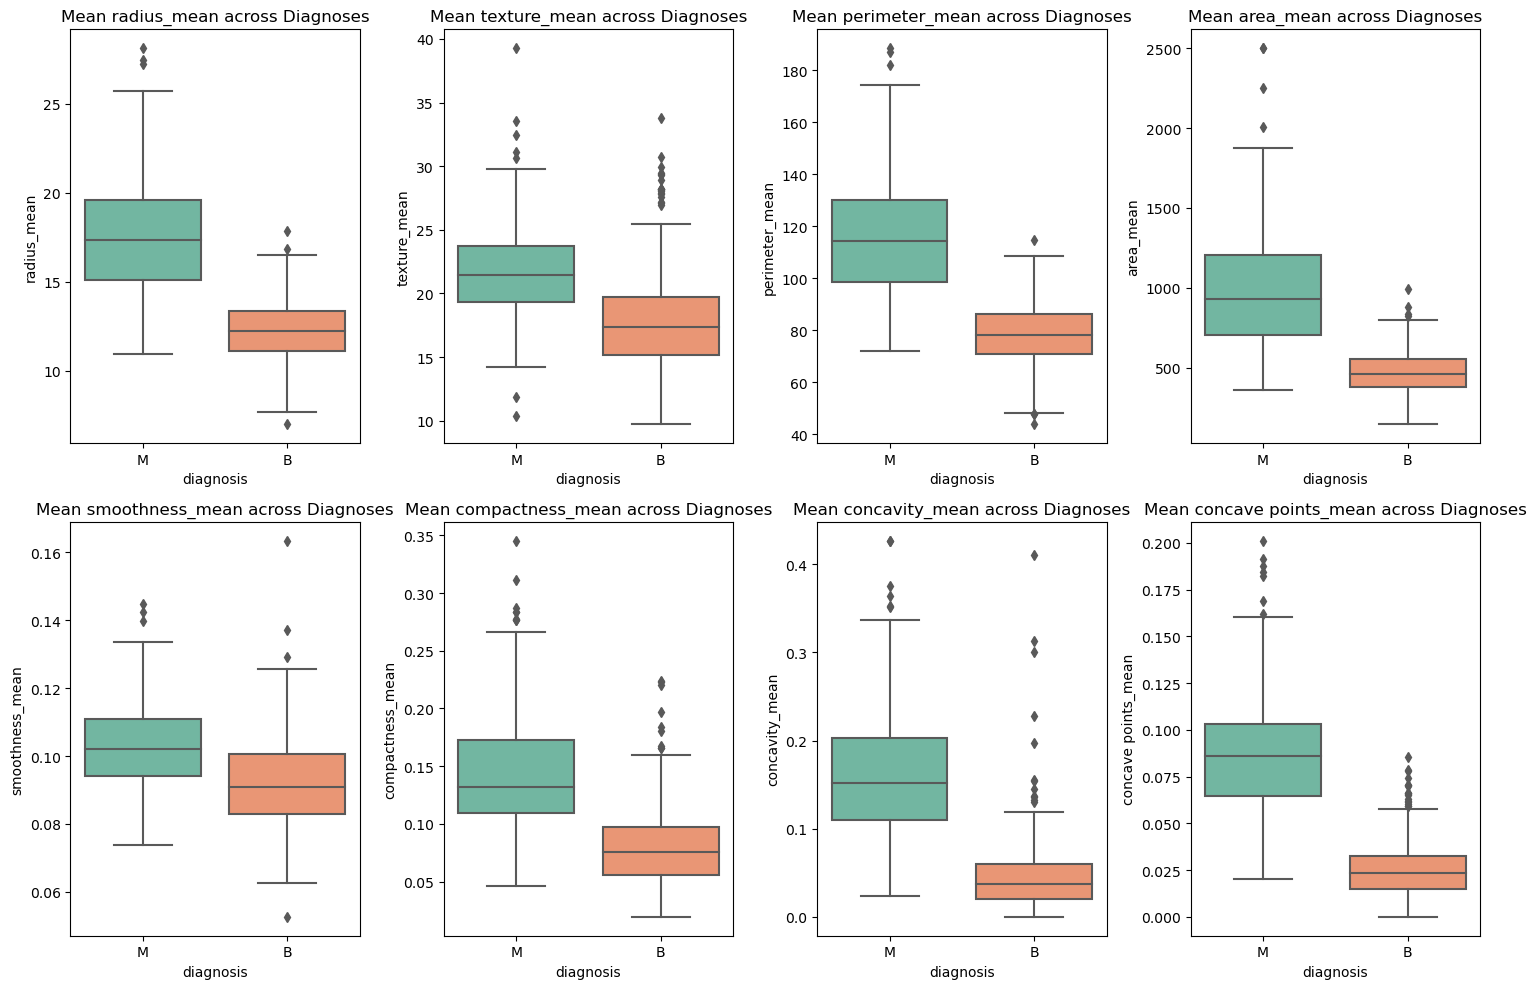

In [28]:
# Plot 1: Mean Measurements across Different Diagnoses
mean_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
plt.figure(figsize=(15, 10))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='diagnosis', y=column, data=data, palette='Set2')
    plt.title(f'Mean {column} across Diagnoses')

plt.tight_layout()
plt.show()

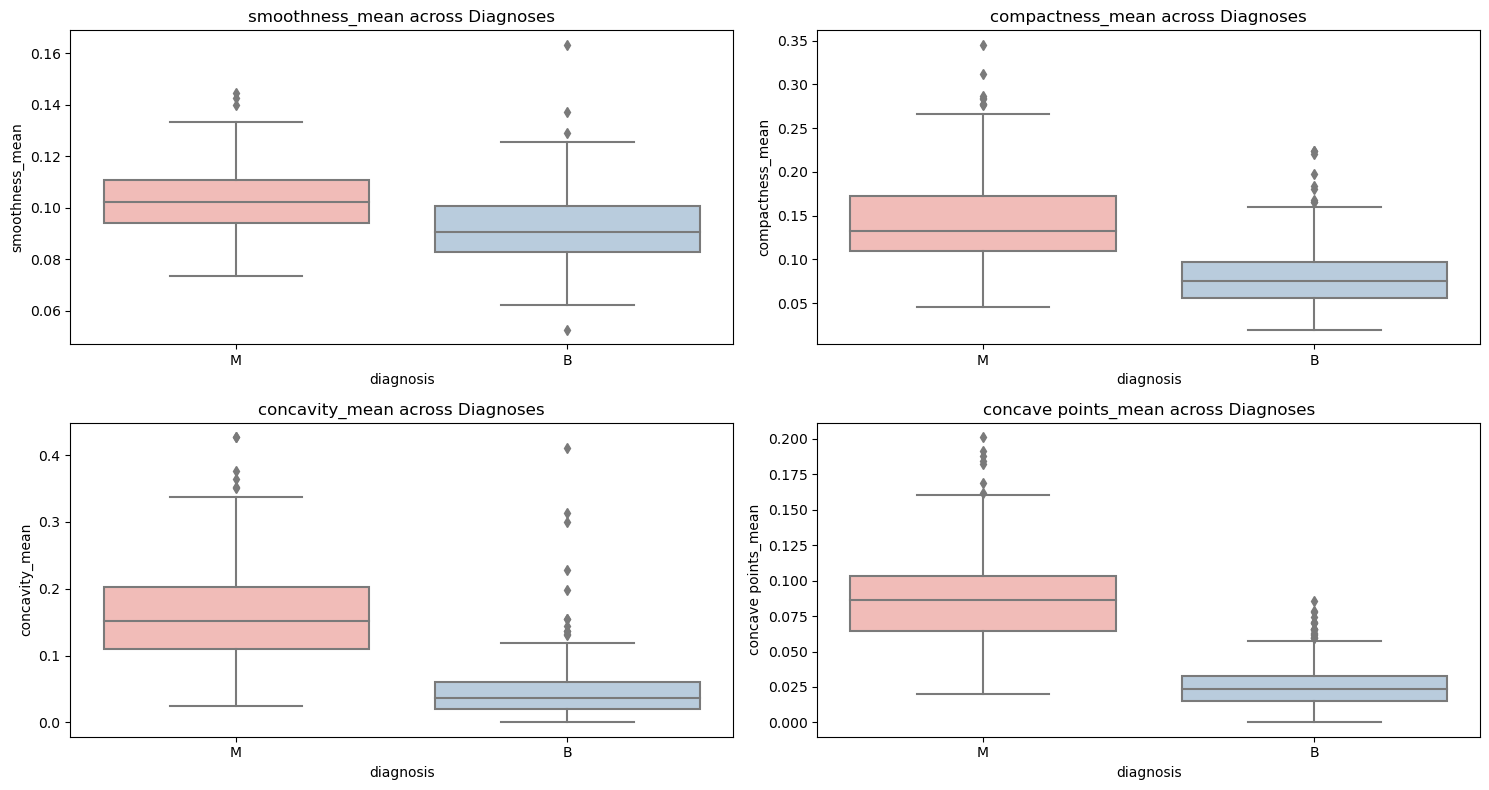

In [29]:
#ariation of Smoothness, Compactness, Concavity, and Concave Points across Diagnoses
texture_columns = ['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
plt.figure(figsize=(15, 8))

for i, column in enumerate(texture_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=column, data=data, palette='Pastel1')
    plt.title(f'{column} across Diagnoses')

plt.tight_layout()
plt.show()

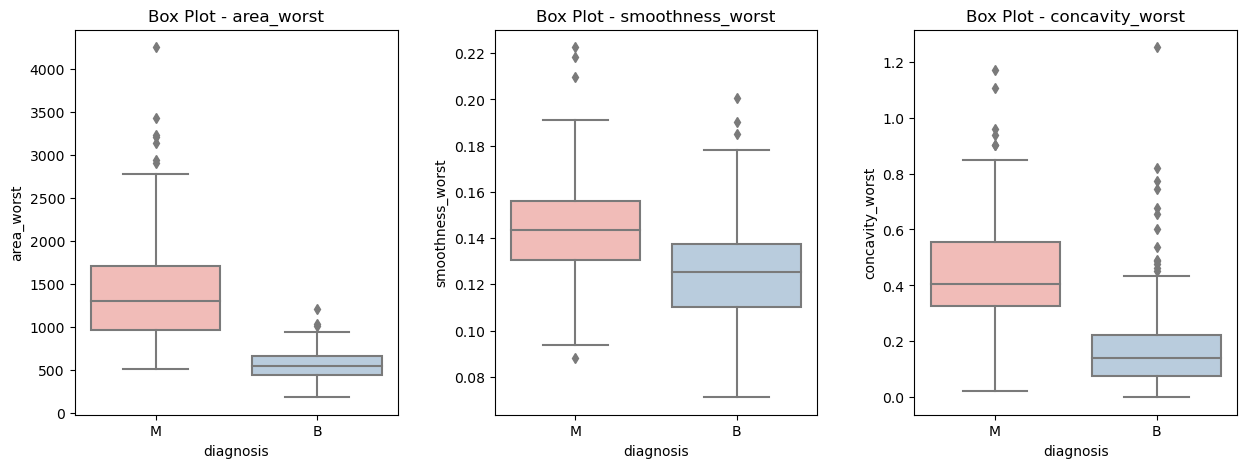

In [30]:
worst_measurement_columns = ['area_worst', 'smoothness_worst', 'concavity_worst']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
for i, column in enumerate(worst_measurement_columns):
    sns.boxplot(ax=axes[i], x=data['diagnosis'], y=data[column], palette='Pastel1')
    axes[i].set_title(f'Box Plot - {column}')

plt.show()

In [31]:
#Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'Embarked' column
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

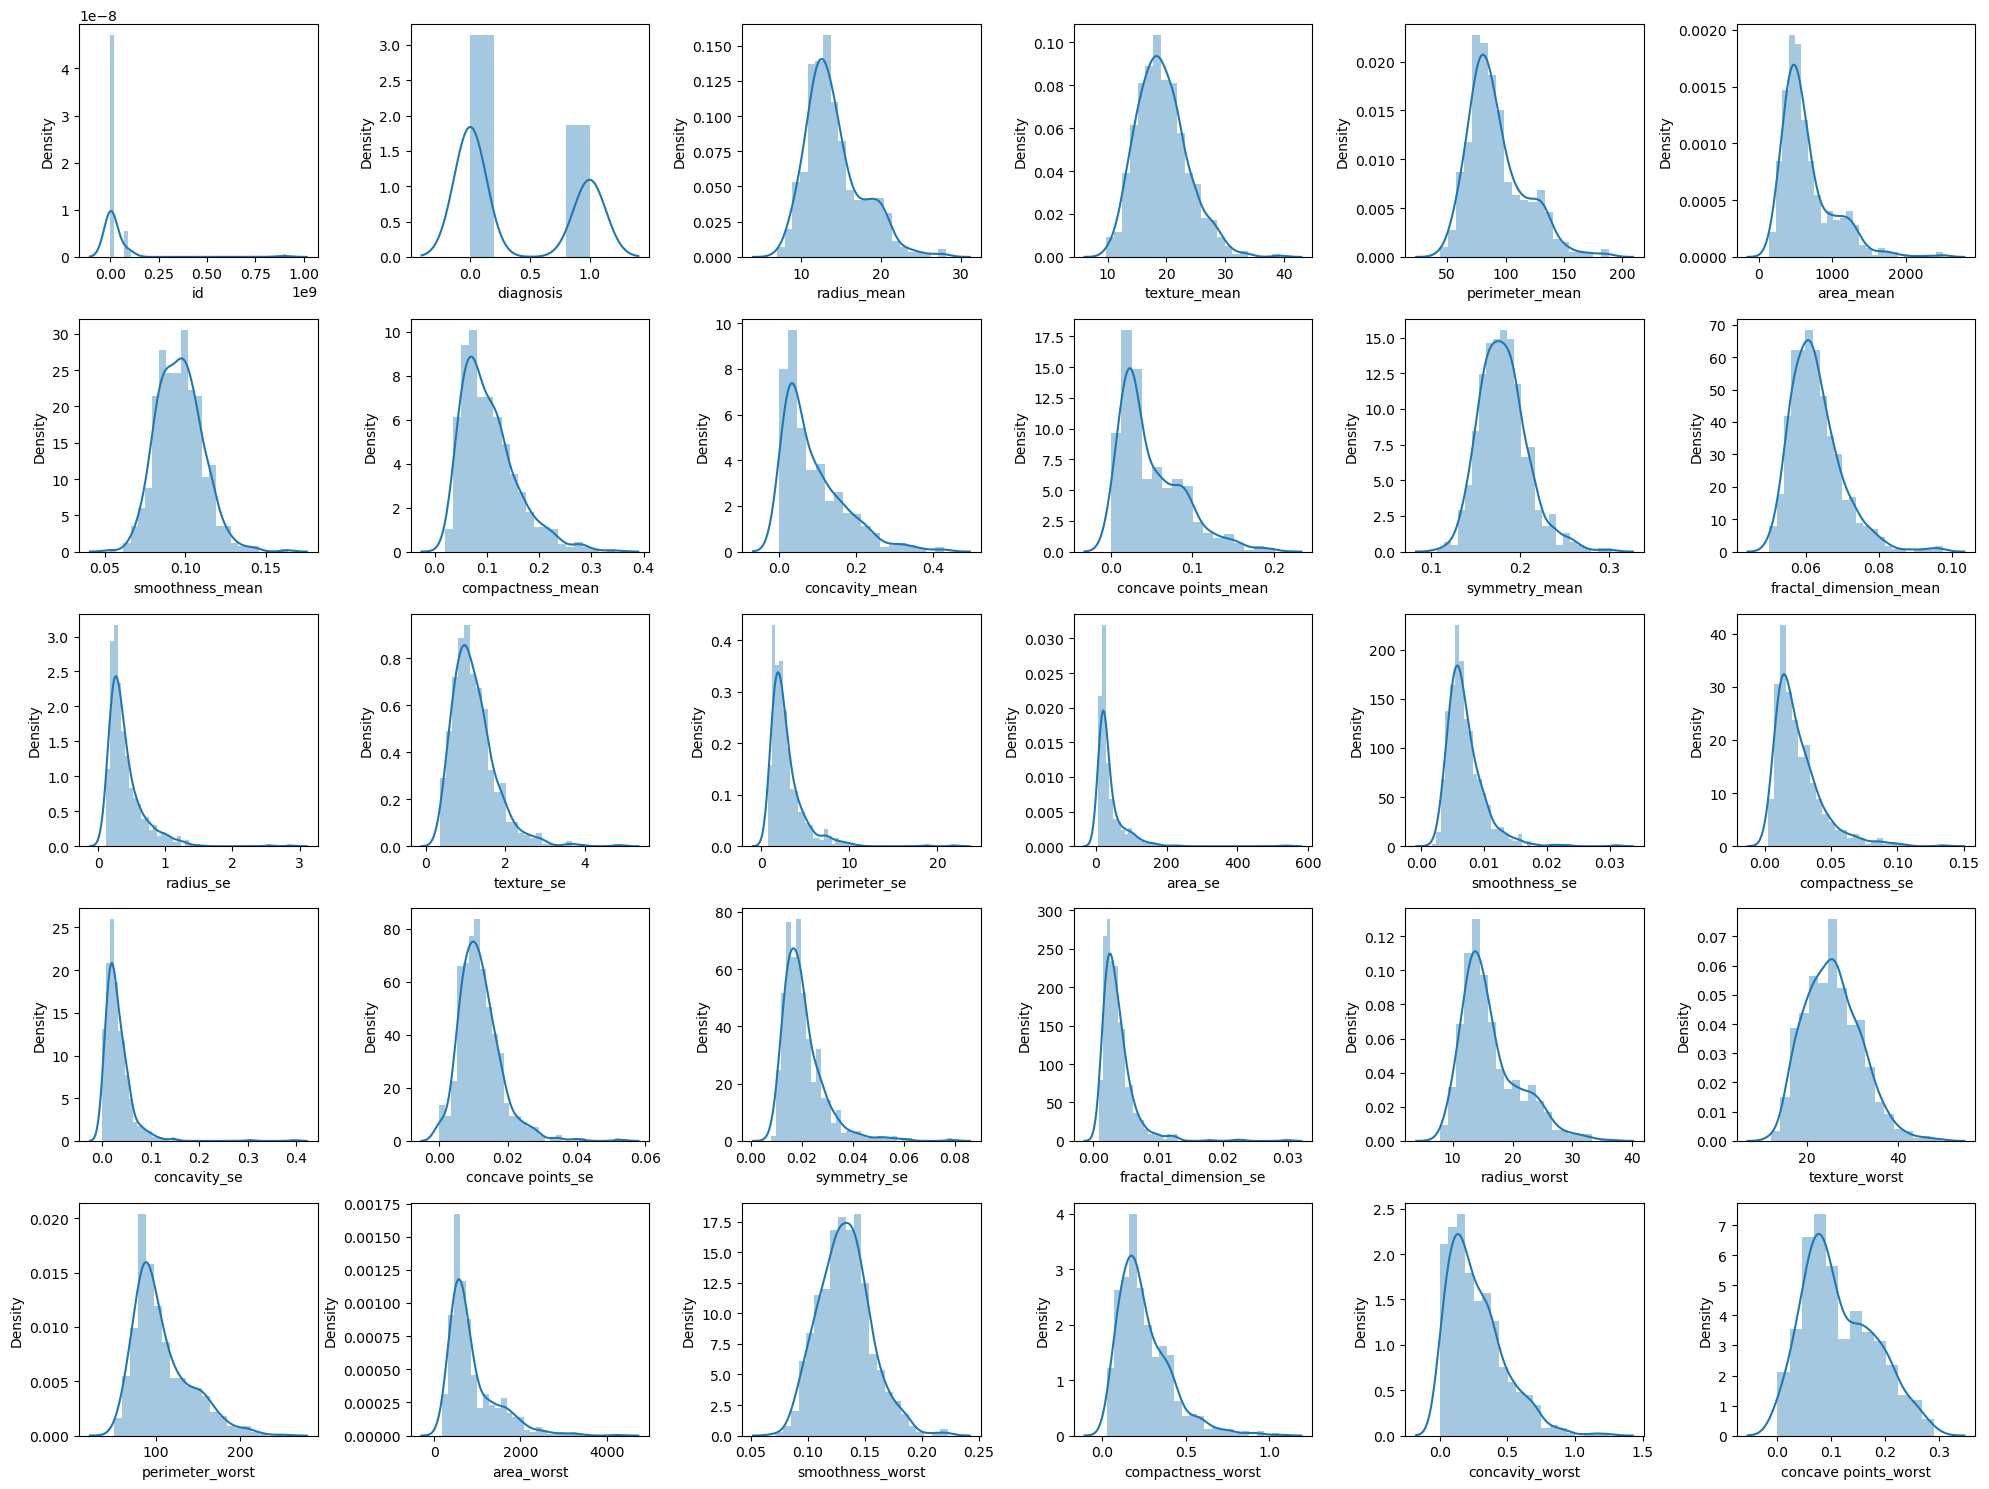

In [32]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Machine Learning  

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is your DataFrame with the specified columns
# Replace 'df' with your actual DataFrame if needed

# Extract features (X) and target variable (y)
X = data.drop(['id', 'diagnosis'], axis=1)  
y = data['diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)



Accuracy: 0.97
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best Hyperparameters: {'C': 10}
Accuracy: 0.97
Confusion Matrix:
[[69  2]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# End 